<a href="https://colab.research.google.com/github/saribasmetehan/beginner-to-intermediate-ml-projects/blob/main/Emlak_fiyat_tahmini_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset yükleme ve analiz
dataset : https://www.kaggle.com/datasets/mokar2001/house-price-tehran-iran/data

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
dataset = pd.read_csv('housePrice.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [4]:
dataset = dataset.dropna(subset=['Address'])

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 172.1+ KB


In [6]:
dataset.shape

(3456, 8)

In [7]:
dataset.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [8]:
dataset["Address"].nunique()

192

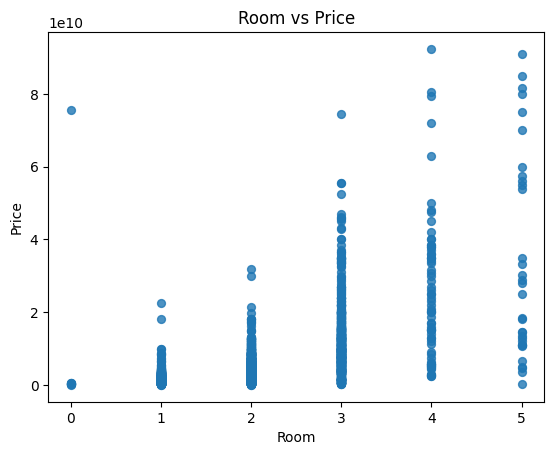

In [9]:
dataset.plot(kind='scatter', x='Room', y='Price', s=32, alpha=.8)
plt.title('Room vs Price')
plt.xlabel('Room')
plt.ylabel('Price')
plt.show()

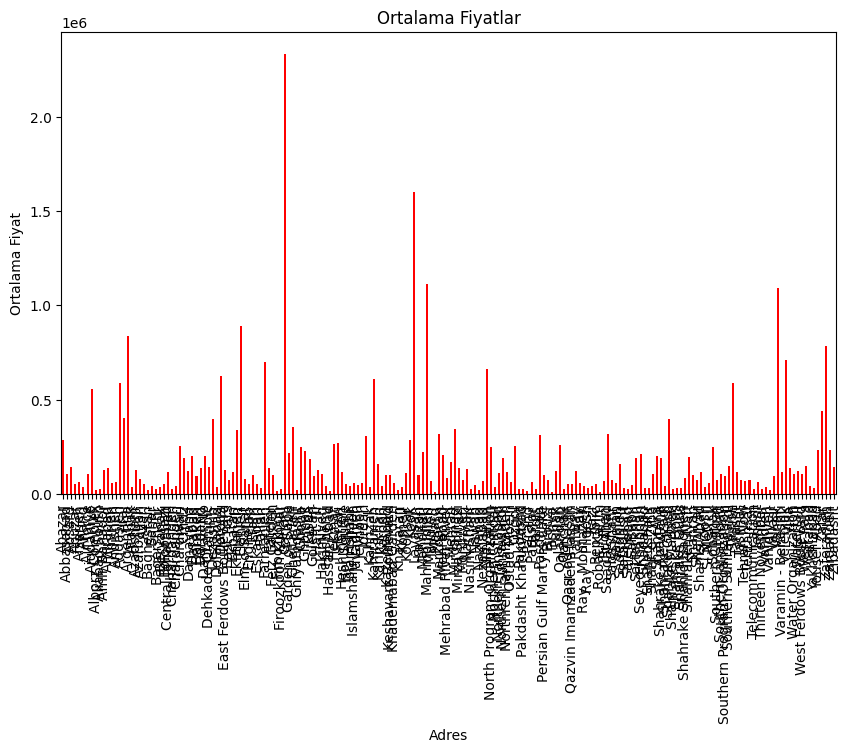

In [10]:
ortalama_fiyat = dataset.groupby('Address')['Price(USD)'].mean()

plt.figure(figsize=(10, 6))
ortalama_fiyat.plot(kind='bar', color='red')
plt.title('Ortalama Fiyatlar')
plt.xlabel('Adres')
plt.ylabel('Ortalama Fiyat')
plt.show()

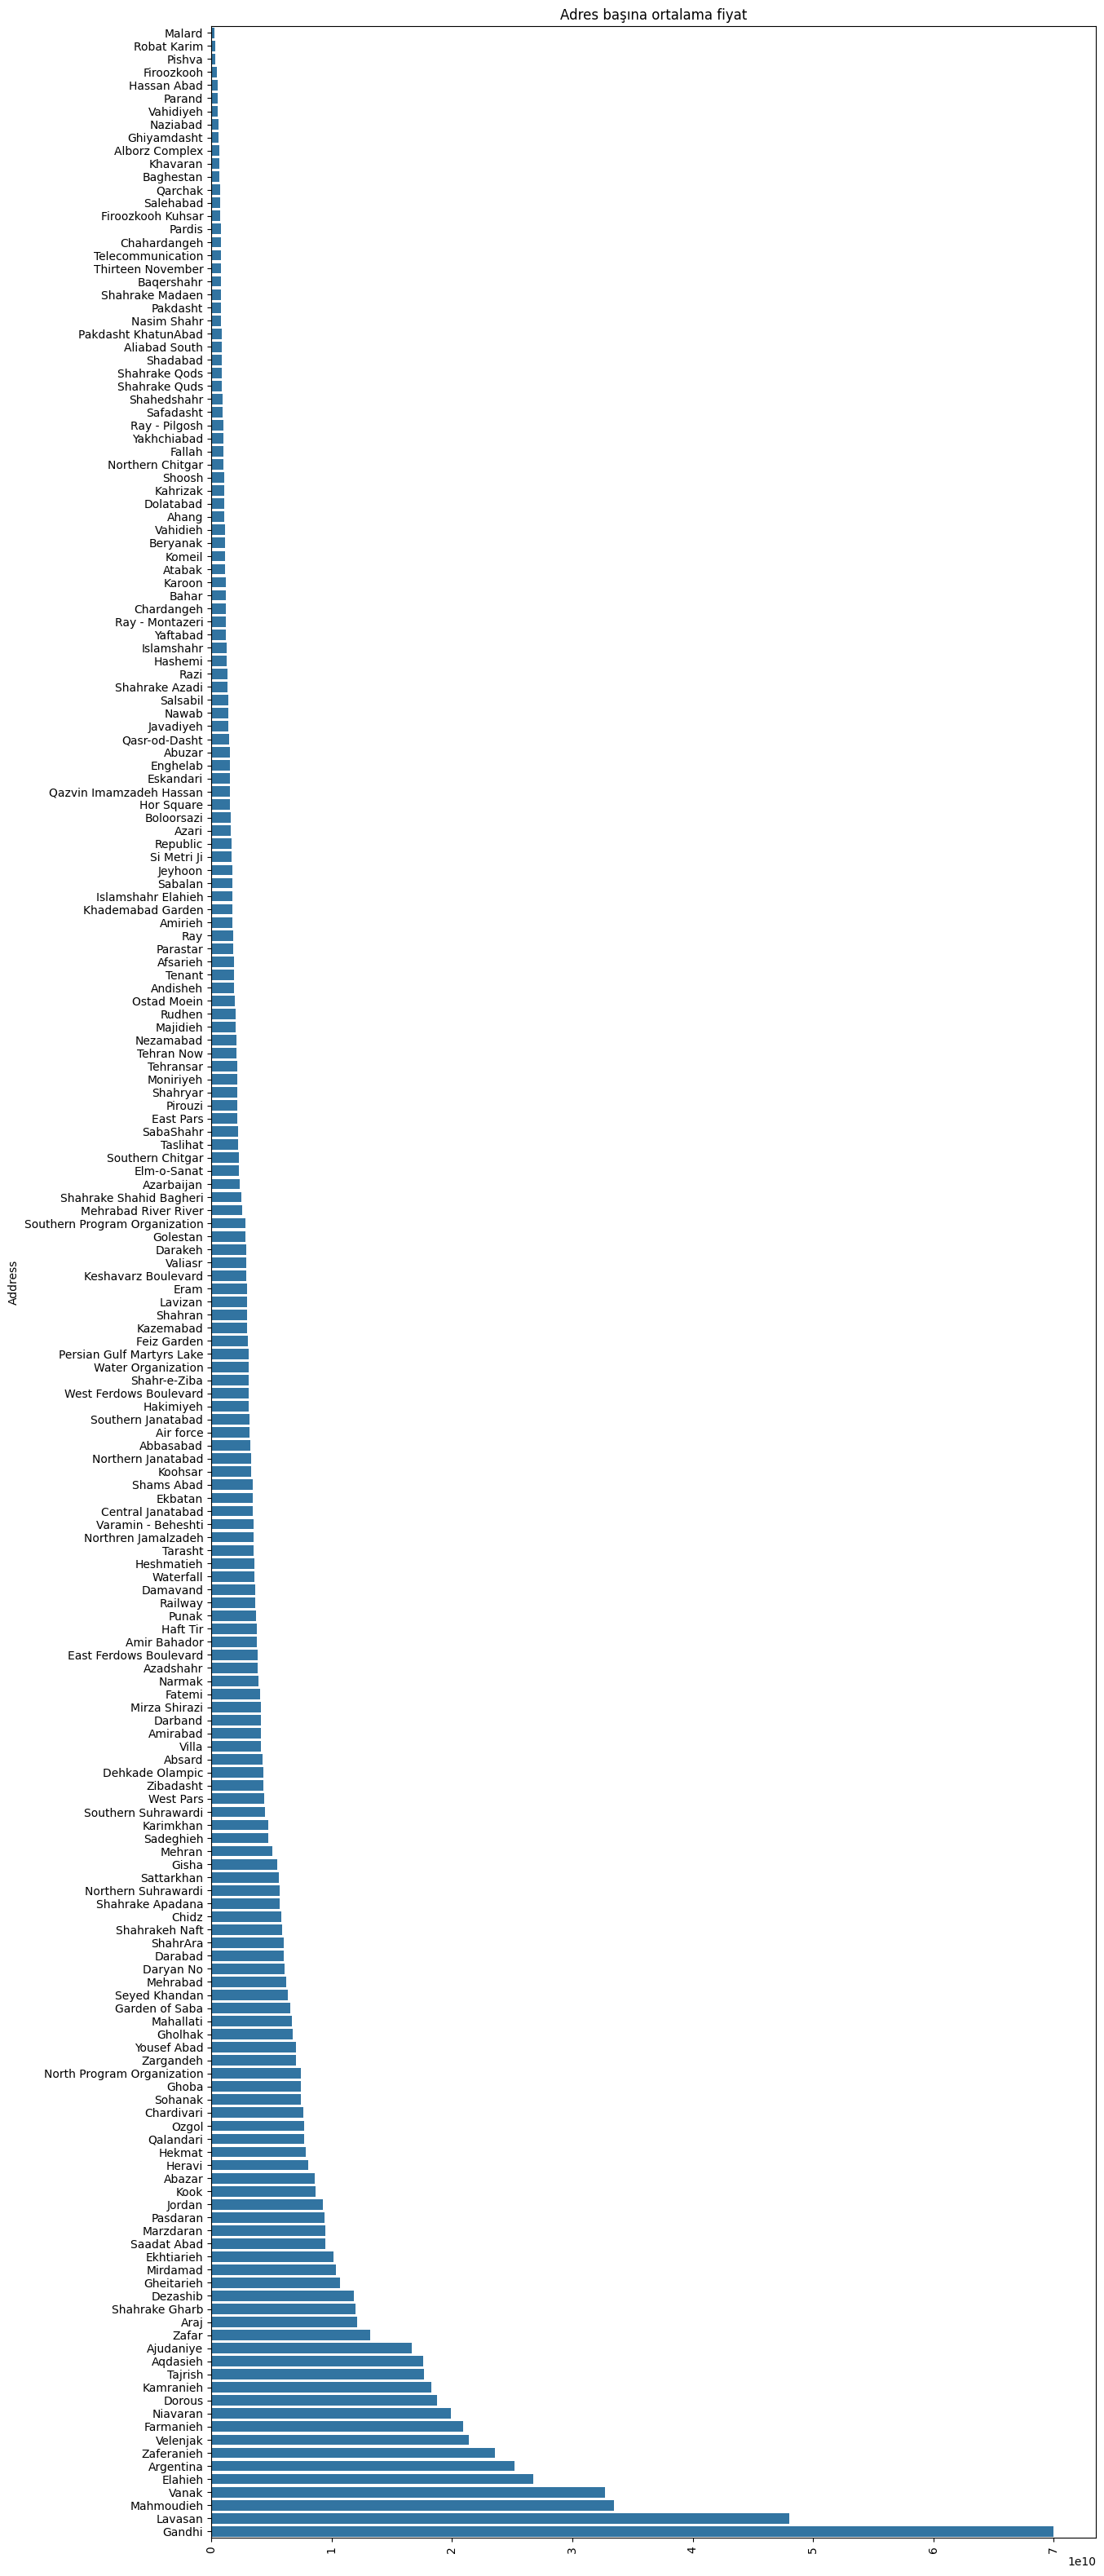

In [11]:
plt.figure(figsize=(14, 40))
mean_prices = dataset.groupby('Address')['Price'].mean().sort_values()
sns.barplot(x=mean_prices.values, y= mean_prices.index)
plt.xticks(rotation=90)
plt.title('Adres başına ortalama fiyat')
plt.show()

# Veri ön işleme (+Label Encoding)

In [12]:
dataset['Parking'] = dataset['Parking'].astype(int)
dataset['Warehouse'] = dataset['Warehouse'].astype(int)
dataset['Elevator'] = dataset['Elevator'].astype(int)
dataset['Area'] = dataset['Area'].str.replace(',', '').astype(int)

In [13]:
dataset.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   int64  
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   int64  
 3   Warehouse   3456 non-null   int64  
 4   Elevator    3456 non-null   int64  
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 243.0+ KB


In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['Address'] = label_encoder.fit_transform(dataset['Address'])

In [28]:
label_encoder.classes_

array(['Abazar', 'Abbasabad', 'Absard', 'Abuzar', 'Afsarieh', 'Ahang',
       'Air force', 'Ajudaniye', 'Alborz Complex', 'Aliabad South',
       'Amir Bahador', 'Amirabad', 'Amirieh', 'Andisheh', 'Aqdasieh',
       'Araj', 'Argentina', 'Atabak', 'Azadshahr', 'Azarbaijan', 'Azari',
       'Baghestan', 'Bahar', 'Baqershahr', 'Beryanak', 'Boloorsazi',
       'Central Janatabad', 'Chahardangeh', 'Chardangeh', 'Chardivari',
       'Chidz', 'Damavand', 'Darabad', 'Darakeh', 'Darband', 'Daryan No',
       'Dehkade Olampic', 'Dezashib', 'Dolatabad', 'Dorous',
       'East Ferdows Boulevard', 'East Pars', 'Ekbatan', 'Ekhtiarieh',
       'Elahieh', 'Elm-o-Sanat', 'Enghelab', 'Eram', 'Eskandari',
       'Fallah', 'Farmanieh', 'Fatemi', 'Feiz Garden', 'Firoozkooh',
       'Firoozkooh Kuhsar', 'Gandhi', 'Garden of Saba', 'Gheitarieh',
       'Ghiyamdasht', 'Ghoba', 'Gholhak', 'Gisha', 'Golestan', 'Haft Tir',
       'Hakimiyeh', 'Hashemi', 'Hassan Abad', 'Hekmat', 'Heravi',
       'Heshmatieh', 'Ho

In [16]:
label_encoder.inverse_transform([3])

array(['Abuzar'], dtype=object)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   int64  
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   int64  
 3   Warehouse   3456 non-null   int64  
 4   Elevator    3456 non-null   int64  
 5   Address     3456 non-null   int64  
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 243.0 KB


In [18]:
dataset.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,156,1.850000e+09,61666.67
1,60,1,1,1,1,156,1.850000e+09,61666.67
2,79,2,1,1,1,117,5.500000e+08,18333.33
3,95,2,1,1,1,152,9.025000e+08,30083.33
4,123,2,1,1,1,150,7.000000e+09,233333.33


In [19]:
dataset["Address"].nunique()

192

# Model kurma ve tahmin etme

In [20]:
x = dataset.drop(['Price(USD)',"Price"], axis=1)
y = dataset['Price(USD)']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.85, random_state=39)

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
model = rf.fit(x_train,y_train)
model.score(x_test,y_test)

0.7948204598493086

In [27]:
model.predict([[63,1,1,1,1,156]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([61380.72540583])